# Importing Modules And DataSet

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [236]:
# IMPORTING DATASET
df = pd.read_csv('Dataset.csv')
df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


# 1 - DATA PRE-PROCESSING

In [237]:
# INFORMATION ABOUT OUR DATASET
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [238]:
# TO CHECK TOTAL NUMBERS OF NULL VALUES IN EACH COLUMN
df.isnull().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [239]:
df.isnull().sum().sum()


60006

## 1.1 DATE-TIME CONVERSION

In [240]:
df['document_create_date.1'] = pd.to_datetime(
    df['document_create_date.1'], format='%Y%m%d')
df['document_create_date.1']


0       2020-01-26
1       2019-07-22
2       2019-09-14
3       2020-03-30
4       2019-11-13
           ...    
49995   2020-04-21
49996   2019-08-15
49997   2020-02-19
49998   2019-11-27
49999   2019-01-05
Name: document_create_date.1, Length: 50000, dtype: datetime64[ns]

In [241]:
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')
df['clear_date']


0       2020-02-11
1       2019-08-08
2       2019-12-30
3              NaT
4       2019-11-25
           ...    
49995          NaT
49996   2019-09-03
49997   2020-03-05
49998   2019-12-12
49999   2019-01-15
Name: clear_date, Length: 50000, dtype: datetime64[ns]

In [242]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
df['posting_date']


0       2020-01-26
1       2019-07-22
2       2019-09-14
3       2020-03-30
4       2019-11-13
           ...    
49995   2020-04-21
49996   2019-08-15
49997   2020-02-19
49998   2019-11-27
49999   2019-01-05
Name: posting_date, Length: 50000, dtype: datetime64[ns]

In [243]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['due_in_date']


0       2020-02-10
1       2019-08-11
2       2019-09-29
3       2020-04-10
4       2019-11-28
           ...    
49995   2020-05-06
49996   2019-08-30
49997   2020-03-05
49998   2019-12-12
49999   2019-01-24
Name: due_in_date, Length: 50000, dtype: datetime64[ns]

In [244]:
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['baseline_create_date']


0       2020-01-26
1       2019-07-22
2       2019-09-14
3       2020-03-31
4       2019-11-13
           ...    
49995   2020-04-21
49996   2019-08-15
49997   2020-02-19
49998   2019-11-27
49999   2019-01-01
Name: baseline_create_date, Length: 50000, dtype: datetime64[ns]

In [245]:
# looking at the converted data-types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

## 1.2 Dropping NULL Values And Unique Columns

### 1.2.1 Dropping NULL Values in area_business

In [246]:
# Drop those column(axis=1) whose all values are NULL(how='all')
df.dropna(axis=1, how='all', inplace=True,)
df.shape
# area_business dropped


(50000, 18)

### 1.2.2 Dropping NULL Values in invoice_id

In [247]:
df[df['invoice_id'].isnull()]


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5095,CA02,0140106054,TREE us,2019-05-31,2019.0,9.500000e+09,2019-03-29,20190329,2019-03-06,2019-03-16,CAD,X2,1.0,1570.59,2019-03-06,CA10,NaN,0
19450,CA02,0100054351,UNF corp,2019-05-02,2019.0,9.500000e+09,2019-03-29,20190329,2019-03-14,2019-03-24,CAD,X2,1.0,5964.00,2019-03-14,CA10,NaN,0
30322,CA02,0140104429,COSTCO systems,2019-05-02,2019.0,9.500000e+09,2019-03-29,20190329,2019-02-19,2019-03-01,CAD,X2,1.0,5353.20,2019-02-19,CA10,NaN,0
31009,CA02,0140106054,TREE llc,2019-05-06,2019.0,9.500000e+09,2019-03-29,20190329,2019-02-08,2019-02-18,CAD,X2,1.0,938.43,2019-02-08,CA10,NaN,0
38443,CA02,0140106054,TREE in,2019-05-06,2019.0,9.500000e+09,2019-03-29,20190329,2019-01-28,2019-02-07,CAD,X2,1.0,12636.00,2019-01-28,CA10,NaN,0
44500,CA02,0140106054,TREE in,2019-05-06,2019.0,9.500000e+09,2019-03-29,20190329,2019-01-31,2019-02-10,CAD,X2,1.0,216.80,2019-01-31,CA10,NaN,0


In [248]:
df['document type'].value_counts()


RV    49994
X2        6
Name: document type, dtype: int64

#### We can see that wherever the invoice id is missing the document type is X2 and posting date is different from document create date.1. Since there are only 6 values and invoice_id needs to be unique we can drop these rows

In [249]:
# Deleting those rows(axis = 0) whose invoiceid is NULL
df.dropna(axis=0, subset=['invoice_id'], inplace=True)
# remove own index with default index (0,1,2,3.....)
df.reset_index(drop=True, inplace=True)
print("invoice_id is Deleted \n (50000-6(ROWS), 18(COLUMNS))\n", df.shape)


invoice_id is Deleted 
 (50000-6(ROWS), 18(COLUMNS))
 (49994, 18)


#### There is No NULL value inside invoice_id:

In [250]:
df[df['invoice_id'].isnull()]


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


### 1.2.3 Checking for Unique Values In Each Column

In [251]:
for cols in df.columns:
    print(f"{cols} : {df[f'{cols}'].nunique()}")


business_code : 6
cust_number : 1424
name_customer : 4193
clear_date : 403
buisness_year : 2
doc_id : 48833
posting_date : 506
document_create_date : 507
document_create_date.1 : 506
due_in_date : 547
invoice_currency : 2
document type : 1
posting_id : 1
total_open_amount : 44344
baseline_create_date : 506
cust_payment_terms : 74
invoice_id : 48833
isOpen : 2


#### In "document_type" and "posting_id" we can see that there is only one value throughtout the col .... so these col is of no use for predection ....we can remove it

In [252]:
print("Total number Of Columns : ", df.shape[1])

# storing and printing those cols whose values are same throughout the col(nunique == 1)
unique_cols = [x for x in df.columns if df[x].nunique() == 1]
print("Unique_columns : ", unique_cols)

# Droping these columns
df.drop(unique_cols, axis=1, inplace=True)

print("unique_columns Removed...")

print("Total number Of Columns : ", df.shape[1])


Total number Of Columns :  18
Unique_columns :  ['document type', 'posting_id']
unique_columns Removed...
Total number Of Columns :  16


In [253]:
df.shape

(49994, 16)

#### Lets check the Null Values Again : 

In [254]:
df.isnull().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

#### No null values (except clear-date) so moving on to removing duplicate columns. clear_date will be handled later

# 1.3 Duplicate Column Removal

In [255]:
# Function to find Duplicate Column :

def findDuplicateColumns(df):
    duplicatecolumns = set()
    for x in range(df.shape[1]):
        col1 = df.iloc[:, x]
        for y in range(x+1, df.shape[1]):
            col2 = df.iloc[:, y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

dupCol = findDuplicateColumns(df)
dupCol


['doc_id', 'posting_date']

#### "doc_id" values are same as "invoice_id"
####  AND
#### "posting_date" values are same as "document_create_date.1"

In [256]:
# Removing "doc_id" and "posting_date"
df.drop(columns=dupCol, inplace=True)


In [257]:
df.shape
# previouly we had 16 columns as we deleted two more columns
# total cols = 14


(49994, 14)

#### Now, to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1, because we will use document_create_date.1 for spliting the data and also document_create_date.1 is normalized version of document_create_date (Refer Dataset-info.md)

In [258]:
df.drop(columns=['document_create_date'], inplace=True)


In [259]:
df.shape
# previouly we had 14 columns as we deleted one more column
# total cols = 13

(49994, 13)

#### Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.

In [260]:
df.drop(columns=['invoice_id'], inplace=True)

In [261]:
df.shape
# previouly we had 13 columns as we deleted one more column
# total cols = 12


(49994, 12)

In [262]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49994 entries, 0 to 49993
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49994 non-null  object        
 1   cust_number             49994 non-null  object        
 2   name_customer           49994 non-null  object        
 3   clear_date              39994 non-null  datetime64[ns]
 4   buisness_year           49994 non-null  float64       
 5   document_create_date.1  49994 non-null  datetime64[ns]
 6   due_in_date             49994 non-null  datetime64[ns]
 7   invoice_currency        49994 non-null  object        
 8   total_open_amount       49994 non-null  float64       
 9   baseline_create_date    49994 non-null  datetime64[ns]
 10  cust_payment_terms      49994 non-null  object        
 11  isOpen                  49994 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), ob

# 1.4 TARGET VARIABLE AND SORT

### Our model cannot take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column, as delay will be in int format which our model can predict easily.

### Delay = [clear_date - due_date] will tell us how much delay was there in paying. 
 
 ### "-" indicates it has been paid off before due date. 
 ### "+" indicates it has been paid off after the due date

In [263]:
# Adding column "delay" using above formula :
# delay will be in integer and specify no of days

df['delay'] = (df['clear_date'] - df['due_in_date']).dt.days


In [264]:
df.shape
# previouly we had 12 columns as we added one more column
# total cols = 13


(49994, 13)

In [265]:
# you can see here delay column is added
df.head(5)


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0,1.0
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,0,-3.0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0,92.0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,1,NaN
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0,-3.0


In [266]:
df.shape

(49994, 13)

### Sorting in ascending order by document_create_date.1

In [267]:
df.sort_values(by='document_create_date.1', inplace=True)
# sorting document_create_date.1 in ascending order
df


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
43098,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
32817,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
44611,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
15510,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
1268,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
7528,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
48269,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
411,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


# 1.5 SPLITTING

## Creating test set on null clear_date

In [268]:
df.clear_date.isnull().sum()


10000

In [269]:
# As there were Total 10K NULL values in clear_date...we use this for test our dataset

test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'], inplace=True)
test_data


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1,NaN
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1,NaN
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1,NaN
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1,NaN
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


### Splitting Our test_data into x_test and y_test
### x_test: will contain remaining columns (not delay column 
### y_test: will contain delay which is fully NULL

In [270]:
ts = test_data.copy()

In [271]:
x_test = test_data.iloc[:, :-1].copy()
x_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   document_create_date.1  10000 non-null  datetime64[ns]
 6   due_in_date             10000 non-null  datetime64[ns]
 7   invoice_currency        10000 non-null  object        
 8   total_open_amount       10000 non-null  float64       
 9   baseline_create_date    10000 non-null  datetime64[ns]
 10  cust_payment_terms      10000 non-null  object        
 11  isOpen                  10000 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), obj

In [272]:
y_test = test_data["delay"]
y_test.info()


<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: delay
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 78.2 KB


### Creating a seprate data frame out of which we will extract val1, val2 and final train set.
WHOLE DATA ---> [TRAIN_DATA + VAL1 (1.5 MONTHS) + VAL2 (1.5 MONTHS)] + TEST_DATA

In [273]:
train_data2 = df[df.clear_date.notnull()].reset_index()
# train set on non-null clear date
train_data2.drop(columns=['index'], inplace=True)
train_data2


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
39990,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
39991,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
39992,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


# Creating Dataframe For Val2
#### using train_data2

In [274]:
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)

''' Above line is calculating 1.5 months prior to last date
    of ordered(ascending) document_create_date.1
    That is 2020-02-27
    so calculated value will be 2020-01-12 '''
print(x)  # 2020-01-12

y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]

''' This line is selecting last date from ordered document_create_date.1
    which should be less than or equal to x ie. 2020-01-12
    and unfortunately last date in ordered document_create_date.1 is 
    same as x (2020-01-12) '''
print(y)  # 2020-01-12


lastLocOfVal2 = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1']  == y].last_valid_index()

'''this line will print the last location of date which is equal
    to y (2020-01-12) from ordered document_create_date.1 '''
print(lastLocOfVal2)


2020-01-12 00:00:00
2020-01-12 00:00:00
35838


#### val2 will start from 2020-01-13 to 2020-02-27

In [275]:
# Dataframe For val2
val2 = train_data2.iloc[lastLocOfVal2+1: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           4155 non-null   object        
 1   cust_number             4155 non-null   object        
 2   name_customer           4155 non-null   object        
 3   clear_date              4155 non-null   datetime64[ns]
 4   buisness_year           4155 non-null   float64       
 5   document_create_date.1  4155 non-null   datetime64[ns]
 6   due_in_date             4155 non-null   datetime64[ns]
 7   invoice_currency        4155 non-null   object        
 8   total_open_amount       4155 non-null   float64       
 9   baseline_create_date    4155 non-null   datetime64[ns]
 10  cust_payment_terms      4155 non-null   object        
 11  isOpen                  4155 non-null   int64         
 12  delay                   4155 non-null   float64 

### Removing val2 from train_data2 and storing into new dataframe say train_data1 to extract val1 from it

In [276]:
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34303 entries, 0 to 35838
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           34303 non-null  object        
 1   cust_number             34303 non-null  object        
 2   name_customer           34303 non-null  object        
 3   clear_date              34303 non-null  datetime64[ns]
 4   buisness_year           34303 non-null  float64       
 5   document_create_date.1  34303 non-null  datetime64[ns]
 6   due_in_date             34303 non-null  datetime64[ns]
 7   invoice_currency        34303 non-null  object        
 8   total_open_amount       34303 non-null  float64       
 9   baseline_create_date    34303 non-null  datetime64[ns]
 10  cust_payment_terms      34303 non-null  object        
 11  isOpen                  34303 non-null  int64         
 12  delay                   34303 non-null  float6

# Creating Dataframe For Val1
#### using train_data1

In [277]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)

''' Above line is calculating 1.5 months prior to last date
    of ordered(ascending) document_create_date.1
    That is 2020-01-12
    so calculated value will be 2019-11-27'''
print(x2) # 2019-11-27

y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]

''' This line is selecting last date from ordered document_create_date.1
    which should be less than or equal to x2 ie. 2019-11-27
    and unfortunately last date in ordered document_create_date.1 is 
    same as x2 (2019-11-27) '''
print(y2) # 2019-11-27


lastLocOfVal1 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 

'''this line will print the last location of date which is equal
    to y2 (2019-11-27) from ordered document_create_date.1 '''
print(lastLocOfVal1)

2019-11-27 00:00:00
2019-11-27 00:00:00
32958


#### val1 will start from 2019-11-28 to 2020-01-12.

In [278]:
# Dataframe For val1
val1 = train_data1.iloc[lastLocOfVal1: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           1345 non-null   object        
 1   cust_number             1345 non-null   object        
 2   name_customer           1345 non-null   object        
 3   clear_date              1345 non-null   datetime64[ns]
 4   buisness_year           1345 non-null   float64       
 5   document_create_date.1  1345 non-null   datetime64[ns]
 6   due_in_date             1345 non-null   datetime64[ns]
 7   invoice_currency        1345 non-null   object        
 8   total_open_amount       1345 non-null   float64       
 9   baseline_create_date    1345 non-null   datetime64[ns]
 10  cust_payment_terms      1345 non-null   object        
 11  isOpen                  1345 non-null   int64         
 12  delay                   1345 non-null   float64 

### Removing val1 from the dataframe and making the final train set.

In [279]:
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32958 non-null  object        
 1   cust_number             32958 non-null  object        
 2   name_customer           32958 non-null  object        
 3   clear_date              32958 non-null  datetime64[ns]
 4   buisness_year           32958 non-null  float64       
 5   document_create_date.1  32958 non-null  datetime64[ns]
 6   due_in_date             32958 non-null  datetime64[ns]
 7   invoice_currency        32958 non-null  object        
 8   total_open_amount       32958 non-null  float64       
 9   baseline_create_date    32958 non-null  datetime64[ns]
 10  cust_payment_terms      32958 non-null  object        
 11  isOpen                  32958 non-null  int64         
 12  delay                   32958 non-null  float6

### We successfully splitted the data into train, val1, val2, and test set.

# 1.6 EDA on Train data Set

# UNIVARIATE ANALYSIS

In [280]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32958 non-null  object        
 1   cust_number             32958 non-null  object        
 2   name_customer           32958 non-null  object        
 3   clear_date              32958 non-null  datetime64[ns]
 4   buisness_year           32958 non-null  float64       
 5   document_create_date.1  32958 non-null  datetime64[ns]
 6   due_in_date             32958 non-null  datetime64[ns]
 7   invoice_currency        32958 non-null  object        
 8   total_open_amount       32958 non-null  float64       
 9   baseline_create_date    32958 non-null  datetime64[ns]
 10  cust_payment_terms      32958 non-null  object        
 11  isOpen                  32958 non-null  int64         
 12  delay                   32958 non-null  float6

### There are No NULL values in out Dataset
### There are only 3 continuous variable column:

### 1] "business_code" : company code of the account

In [281]:
train_data.business_code.value_counts()

U001    29745
CA02     2676
U013      421
U002      105
U005        9
U007        2
Name: business_code, dtype: int64

In [282]:
print("Unique Buisness Code: ",len(dict(train_data.business_code.value_counts())))

Unique Buisness Code:  6


<AxesSubplot:xlabel='business_code', ylabel='count'>

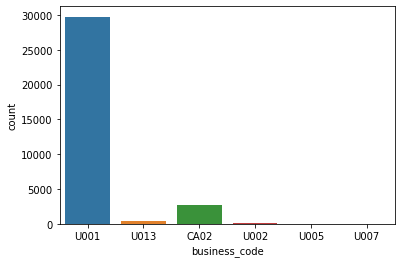

In [283]:
sns.countplot(x =train_data['business_code'])

### 2] "cust_number" : customer number given to all the customers of the Account.

In [284]:
train_data.cust_number.value_counts()

0200769623    7292
0200726979    1195
0200762301     972
0200759878     863
0200794332     722
              ... 
0200758531       1
0100043885       1
200792283        1
0200943457       1
0200739074       1
Name: cust_number, Length: 1279, dtype: int64

In [285]:
print("Unique Customers: ",len(dict(train_data.cust_number.value_counts())))

Unique Customers:  1279


#### There are 1279 unique customers or comapny that we have transactions with.

#### cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

### 3] "name_customer" : name of the customer.

In [286]:
train_data.name_customer.value_counts()

WAL-MAR trust          781
WAL-MAR                745
WAL-MAR in             743
WAL-MAR corporation    736
WAL-MAR corp           735
                      ... 
CHIHAD co                1
MARTIN  trust            1
SYSCO IN us              1
GLOBA us                 1
TFC us                   1
Name: name_customer, Length: 3596, dtype: int64

In [287]:
print("Unique Customer_Name: ",len(dict(train_data.name_customer.value_counts())))

Unique Customer_Name:  3596


### 4] "clear_date" : The date on which the customer clears an invoice, or in simple terms, they make the full payment.

In [288]:
train_data.clear_date.min()

Timestamp('2019-01-03 00:00:00')

In [289]:
train_data.clear_date.max()

Timestamp('2019-12-31 00:00:00')

##### Our clear_date rangess from 362 days

In [290]:
clear_date_range = train_data.clear_date.max() - train_data.clear_date.min()
clear_date_range

Timedelta('362 days 00:00:00')

In [291]:
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

5     3246
4     3044
10    3008
11    2981
8     2944
7     2927
3     2849
12    2813
9     2798
6     2679
2     2379
1     1290
Name: clear_date, dtype: int64

#### May is the month where the companies completed their maximum transations.

<AxesSubplot:xlabel='clear_date', ylabel='count'>

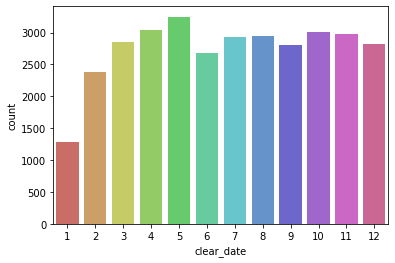

In [292]:
sns.countplot(x=clear_month, palette="hls")

### 5] "buisness_year" : indicates the year of clear date

In [293]:
train_data.buisness_year.value_counts()

2019.0    32958
Name: buisness_year, dtype: int64

### 6] "document_create_date.1" : The date on which the invoice document was created

In [294]:
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [295]:
train_data["document_create_date.1"].max()

Timestamp('2019-12-15 00:00:00')

#### It ranges for 350 days, almost less than a year

In [296]:
document_create_date_1_range = train_data["document_create_date.1"].max() - train_data["document_create_date.1"].min()
document_create_date_1_range

Timedelta('350 days 00:00:00')

### 7] "invoice_currency" : The currency of the invoice amount in the document for the invoice

In [297]:
train_data["invoice_currency"].value_counts()

USD    30280
CAD     2678
Name: invoice_currency, dtype: int64

##### As there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

### 8] "total_open_amount" : The amount that is yet to be paid for that invoice

In [298]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count     32958.000000
mean      32192.198099
std       39984.661856
min           0.790000
25%        4688.977500
50%       17238.615000
75%       46542.090000
max      668593.360000
Name: total_open_amount, dtype: object

### Automatically binning the amount using pd.qcut.

In [299]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(0.789, 828.458]          3296
(828.458, 2945.162]       3296
(2945.162, 6981.297]      3296
(12783.288, 17238.615]    3296
(17238.615, 25411.306]    3296
(39300.594, 54979.266]    3296
(54979.266, 82017.985]    3296
(82017.985, 668593.36]    3296
(6981.297, 12783.288]     3295
(25411.306, 39300.594]    3295
Name: total_open_amount, dtype: int64

In [300]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

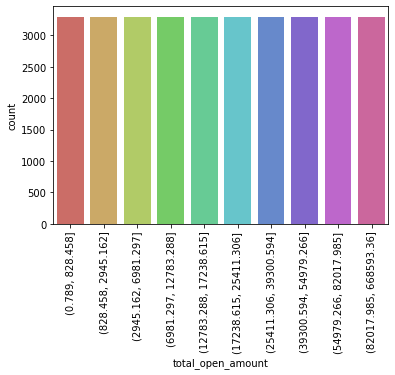

In [301]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

### 9] "baseline_create_date" : The date on which the Invoice was created.

In [302]:
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
30,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2019-01-10,CAD,117723.35,2018-12-31,CA10,0,111.0
92,CA02,0140104423,METRO,2019-01-18,2019.0,2018-12-31,2019-01-12,CAD,71231.97,2019-01-02,CA10,0,6.0
127,CA02,0140104340,COLABOR systems,2019-01-17,2019.0,2018-12-31,2019-01-13,CAD,1824.47,2019-01-03,CA10,0,4.0
167,CA02,0140105785,SHOPPE trust,2019-01-25,2019.0,2019-01-02,2019-01-21,CAD,45710.70,2019-01-11,CA10,0,4.0
169,CA02,0140104409,LOB corp,2019-01-18,2019.0,2019-01-02,2019-01-14,CAD,259891.02,2019-01-04,CA10,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34343,CA02,0140104240,FEDER trust,2019-12-30,2019.0,2019-12-13,2019-12-29,CAD,174769.75,2019-12-19,CA10,0,1.0
34353,CA02,0140104440,SO associates,2019-12-31,2019.0,2019-12-13,2019-12-27,CAD,16832.57,2019-12-17,CA10,0,4.0
34404,CA02,0140104423,METRO corp,2019-12-24,2019.0,2019-12-14,2019-12-26,CAD,285167.16,2019-12-16,CA10,0,-2.0
34437,CA02,0140106408,WAL-M us,2019-12-30,2019.0,2019-12-15,2019-12-26,CAD,119903.42,2019-12-16,CA10,0,4.0


#### Baseline create date and document create date are same except if the company is canadian there is a delay in filing the document and creating an invoice. 
#### It's not that important to our model so we'll drop it.

### 10] "cust_payment_terms" : Business terms and agreements between customers and accounts on discounts and days of payment.

#### It is same as cust_number.

In [303]:
train_data.cust_payment_terms.value_counts()

NAA8    13176
NAH4     8719
CA10     2591
NAC6     1099
NAM4      870
        ...  
NAUW        1
NAD8        1
NABD        1
NAUY        1
CA60        1
Name: cust_payment_terms, Length: 69, dtype: int64

In [304]:
len(dict(train_data.cust_number.value_counts()))

1279

### 11] "isOpen" : Tells whether a transaction is open or closed

In [305]:
train_data.isOpen.value_counts()

0    32958
Name: isOpen, dtype: int64

#### isOpen is 0 for all the train set as all the invoices has been closed. So we can drop this column.

### 12] "Delay" : The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have capped the negative values to 0.

In [306]:
train_data.delay[train_data.delay<0].count()

12051

In [307]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
# Converting All the early payment (before due date) will set to Zero 
# Means no delay.
train_data.delay[train_data.delay<0].count()

0

In [308]:
train_data.delay.describe()

count    32958.000000
mean         2.722131
std          9.143224
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        204.000000
Name: delay, dtype: float64

# MULTIVARIATE ANALYSIS

## 1] Relation b/w "business_code" with "invoice_currency".

In [309]:
train_data['invoice_currency'].value_counts()

USD    30280
CAD     2678
Name: invoice_currency, dtype: int64

In [310]:
train_data.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2676
U001           USD                 29745
U002           USD                   105
U005           USD                     9
U007           USD                     2
U013           USD                   419
               CAD                     2
Name: invoice_currency, dtype: int64

### We see that business code first letter describes in which currency the transaction took place except for 2 entries. Let's explore them further

In [311]:
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2676
                  U013                 2
USD               U001             29745
                  U013               419
                  U002               105
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

#### business_code U013 is an US based company but paying in CAD

In [312]:
temp = train_data.loc[train_data['business_code'] == 'U013']
temp.loc[temp['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
704,U013,0100052318,PRATT' systems,2019-02-23,2019.0,2019-01-08,2019-02-07,CAD,3880.79,2019-01-08,NAVE,0,16.0
32790,U013,0100052318,PRATT' co,2019-12-24,2019.0,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


#### We see that only PRATT company is the only US based company paying in CAD.

#### Morever they are only 2 transactions so it's not as significant. They don't even have any delay so this won't affect our model.

## 2] Relation between "total_open_amount" and "delay"

In [313]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",2830,93,84,68,88
"(5000, 10000]",1277,56,62,37,24
"(10000, 50000]",5430,239,151,86,59
"(50000, 100000]",2197,42,15,7,12
"(100000, 1100000]",1043,16,15,7,4


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

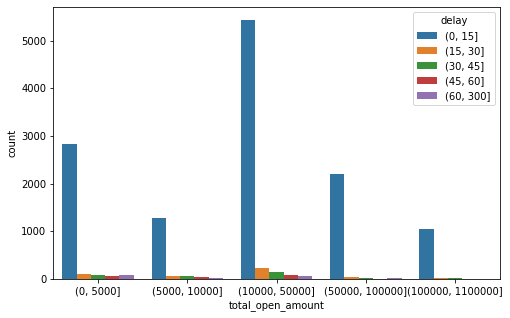

In [314]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

#### As we can see from the graph for each bucket the amount was returned in 0-15 delay days.

In [315]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.042408
isOpen,NaN,NaN,NaN,NaN
delay,NaN,-0.042408,NaN,1.000000


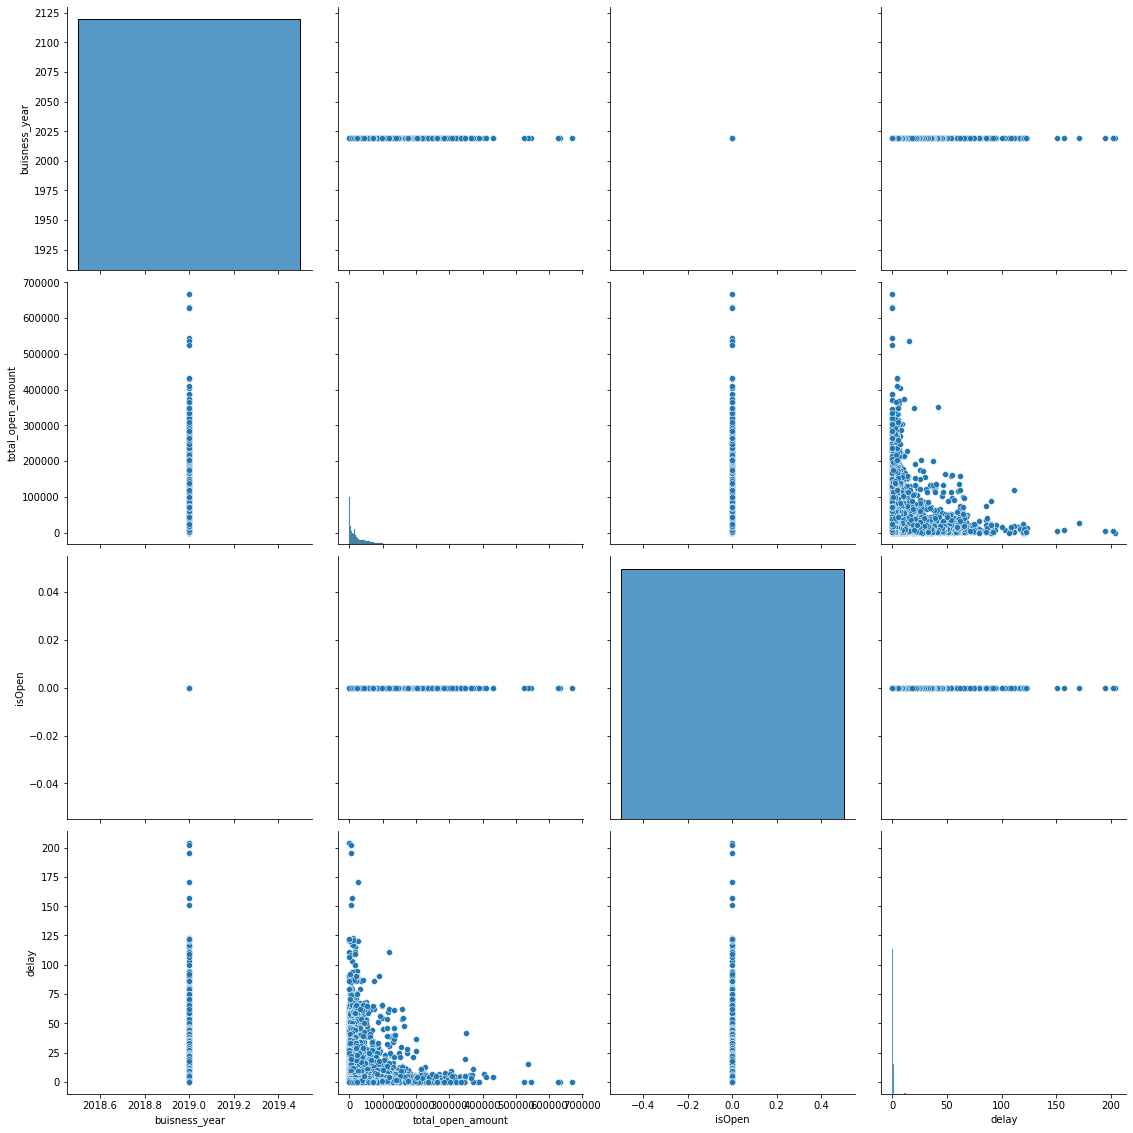

In [316]:
sns.pairplot(train_data, height=4)

#### We can infer: The total open amount decreses as the delay increases. There is negative co-relation.

# FEATURE ENGINEERING

In [317]:
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0
...,...,...,...,...,...,...
34439,0200769623,2019-12-27,2019-12-15,2019-12-30,71699.73,0.0
34440,0200776463,2019-12-30,2019-12-15,2019-12-30,19436.30,0.0
34441,0200148860,2019-12-30,2019-12-15,2019-12-30,14776.32,0.0
34442,0200706844,2019-12-31,2019-12-15,2019-12-30,18644.84,1.0


#### Extracting day and month from document_create_date.1 and due_in_date.

In [318]:
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [319]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0,30,12,14,1
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0,30,12,14,1
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0,30,12,14,1
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
34439,0200769623,2019-12-27,2019-12-15,2019-12-30,71699.73,0.0,15,12,30,12
34440,0200776463,2019-12-30,2019-12-15,2019-12-30,19436.30,0.0,15,12,30,12
34441,0200148860,2019-12-30,2019-12-15,2019-12-30,14776.32,0.0,15,12,30,12
34442,0200706844,2019-12-31,2019-12-15,2019-12-30,18644.84,1.0,15,12,30,12


In [320]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,14559.00,0.0,30,12,14,1
1,0200769623,25749.68,0.0,30,12,14,1
2,0200726979,58.18,1.0,30,12,14,1
3,0200769623,4890.99,0.0,30,12,14,1
4,0200769623,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...
34439,0200769623,71699.73,0.0,15,12,30,12
34440,0200776463,19436.30,0.0,15,12,30,12
34441,0200148860,14776.32,0.0,15,12,30,12
34442,0200706844,18644.84,1.0,15,12,30,12


#### Extracting the integer part from cust_number

In [321]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,0.0,30,12,14,1,0200769623
1,25749.68,0.0,30,12,14,1,0200769623
2,58.18,1.0,30,12,14,1,0200726979
3,4890.99,0.0,30,12,14,1,0200769623
4,9785.88,1.0,30,12,14,1,0200769623
...,...,...,...,...,...,...,...
34439,71699.73,0.0,15,12,30,12,0200769623
34440,19436.30,0.0,15,12,30,12,0200776463
34441,14776.32,0.0,15,12,30,12,0200148860
34442,18644.84,1.0,15,12,30,12,0200706844


In [322]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32958 non-null  float64
 1   delay              32958 non-null  float64
 2   doc_create_day     32958 non-null  int64  
 3   doc_create_month   32958 non-null  int64  
 4   due_day            32958 non-null  int64  
 5   due_month          32958 non-null  int64  
 6   cn                 32958 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ MB


#### Converting the data-type of cn as float

In [323]:
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32958 non-null  float64
 1   delay              32958 non-null  float64
 2   doc_create_day     32958 non-null  int64  
 3   doc_create_month   32958 non-null  int64  
 4   due_day            32958 non-null  int64  
 5   due_month          32958 non-null  int64  
 6   cn                 32958 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.0 MB


### Splitting into x_train and y_train

In [324]:
y_train = train_data['delay']
y_train

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
34439    0.0
34440    0.0
34441    0.0
34442    1.0
34443    0.0
Name: delay, Length: 32958, dtype: float64

In [325]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,30,12,14,1,200769623.0
1,25749.68,30,12,14,1,200769623.0
2,58.18,30,12,14,1,200726979.0
3,4890.99,30,12,14,1,200769623.0
4,9785.88,30,12,14,1,200769623.0
...,...,...,...,...,...,...
34439,71699.73,15,12,30,12,200769623.0
34440,19436.30,15,12,30,12,200776463.0
34441,14776.32,15,12,30,12,200148860.0
34442,18644.84,15,12,30,12,200706844.0


### Now we need to repeat the same process on val1, val2 and x_test.

# 1] val1

In [326]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           1345 non-null   object        
 1   cust_number             1345 non-null   object        
 2   name_customer           1345 non-null   object        
 3   clear_date              1345 non-null   datetime64[ns]
 4   buisness_year           1345 non-null   float64       
 5   document_create_date.1  1345 non-null   datetime64[ns]
 6   due_in_date             1345 non-null   datetime64[ns]
 7   invoice_currency        1345 non-null   object        
 8   total_open_amount       1345 non-null   float64       
 9   baseline_create_date    1345 non-null   datetime64[ns]
 10  cust_payment_terms      1345 non-null   object        
 11  isOpen                  1345 non-null   int64         
 12  delay                   1345 non-null   float64 

In [327]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)

val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  1345 non-null   float64
 1   delay              1345 non-null   float64
 2   doc_create_day     1345 non-null   int64  
 3   doc_create_month   1345 non-null   int64  
 4   due_day            1345 non-null   int64  
 5   due_month          1345 non-null   int64  
 6   cn                 1345 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.7 KB


In [328]:
val1

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,23231.67,0.0,15,12,30,12,200707822.0
1,642.66,0.0,15,12,30,12,200726979.0
2,201.50,0.0,15,12,2,1,140104409.0
3,15797.76,0.0,15,12,30,12,200148860.0
4,11611.60,1.0,15,12,30,12,200769623.0
...,...,...,...,...,...,...,...
1340,13891.02,1.0,12,1,27,1,200759878.0
1341,21795.65,0.0,12,1,27,1,200769623.0
1342,826.01,0.0,12,1,27,1,200769623.0
1343,85097.42,1.0,12,1,27,1,200762301.0


### Splitting val1 into x_val1 and y_val2

In [329]:
y_val1 = val1['delay']
y_val1

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1340    1.0
1341    0.0
1342    0.0
1343    1.0
1344    0.0
Name: delay, Length: 1345, dtype: float64

In [330]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,23231.67,15,12,30,12,200707822.0
1,642.66,15,12,30,12,200726979.0
2,201.50,15,12,2,1,140104409.0
3,15797.76,15,12,30,12,200148860.0
4,11611.60,15,12,30,12,200769623.0
...,...,...,...,...,...,...
1340,13891.02,12,1,27,1,200759878.0
1341,21795.65,12,1,27,1,200769623.0
1342,826.01,12,1,27,1,200769623.0
1343,85097.42,12,1,27,1,200762301.0


# 2] val2

In [331]:
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           4155 non-null   object        
 1   cust_number             4155 non-null   object        
 2   name_customer           4155 non-null   object        
 3   clear_date              4155 non-null   datetime64[ns]
 4   buisness_year           4155 non-null   float64       
 5   document_create_date.1  4155 non-null   datetime64[ns]
 6   due_in_date             4155 non-null   datetime64[ns]
 7   invoice_currency        4155 non-null   object        
 8   total_open_amount       4155 non-null   float64       
 9   baseline_create_date    4155 non-null   datetime64[ns]
 10  cust_payment_terms      4155 non-null   object        
 11  isOpen                  4155 non-null   int64         
 12  delay                   4155 non-null   float64 

In [332]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)

val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4155 non-null   float64
 1   delay              4155 non-null   float64
 2   doc_create_day     4155 non-null   int64  
 3   doc_create_month   4155 non-null   int64  
 4   due_day            4155 non-null   int64  
 5   due_month          4155 non-null   int64  
 6   cn                 4155 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 227.4 KB


In [333]:
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,8940.20,0.0,13,1,28,1,200762301.0
1,5396.01,0.0,13,1,28,1,200729942.0
2,25025.65,3.0,13,1,1,2,140105686.0
3,15824.07,0.0,13,1,28,1,200762301.0
4,19688.89,0.0,13,1,28,1,200769623.0
...,...,...,...,...,...,...,...
4150,44450.82,0.0,26,2,12,3,200571849.0
4151,67471.47,0.0,26,2,12,3,200769623.0
4152,10349.36,6.0,27,2,13,3,200418007.0
4153,49290.19,0.0,27,2,13,3,200759878.0


### Splitting val2 into x_val2 and y_val2

In [334]:
y_val2 = val2['delay']
y_val2

0       0.0
1       0.0
2       3.0
3       0.0
4       0.0
       ... 
4150    0.0
4151    0.0
4152    6.0
4153    0.0
4154    3.0
Name: delay, Length: 4155, dtype: float64

In [335]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,8940.20,13,1,28,1,200762301.0
1,5396.01,13,1,28,1,200729942.0
2,25025.65,13,1,1,2,140105686.0
3,15824.07,13,1,28,1,200762301.0
4,19688.89,13,1,28,1,200769623.0
...,...,...,...,...,...,...
4150,44450.82,26,2,12,3,200571849.0
4151,67471.47,26,2,12,3,200769623.0
4152,10349.36,27,2,13,3,200418007.0
4153,49290.19,27,2,13,3,200759878.0


## 3] x_test

In [336]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   document_create_date.1  10000 non-null  datetime64[ns]
 6   due_in_date             10000 non-null  datetime64[ns]
 7   invoice_currency        10000 non-null  object        
 8   total_open_amount       10000 non-null  float64       
 9   baseline_create_date    10000 non-null  datetime64[ns]
 10  cust_payment_terms      10000 non-null  object        
 11  isOpen                  10000 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), obj

In [337]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)

x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  10000 non-null  float64
 1   doc_create_day     10000 non-null  int64  
 2   doc_create_month   10000 non-null  int64  
 3   due_day            10000 non-null  int64  
 4   due_month          10000 non-null  int64  
 5   cn                 10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [338]:
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,32922.51,27,2,13,3,200769623.0
1,4827.34,27,2,13,3,200806580.0
2,14706.47,27,2,13,3,200769623.0
3,413.83,27,2,13,3,200726979.0
4,15651.65,27,2,2,5,200014556.0
...,...,...,...,...,...,...
9995,34301.32,15,5,30,5,200541916.0
9996,22835.50,17,5,1,6,200759878.0
9997,1232.00,18,5,2,6,200915438.0
9998,7035.00,19,5,19,5,100027744.0


# FEATURE SELECTION

<AxesSubplot:>

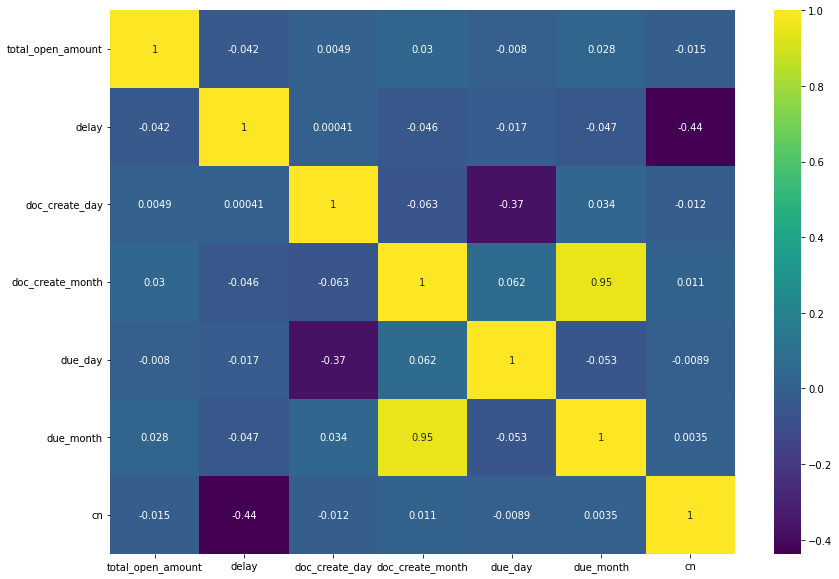

In [339]:
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

### As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month. 

In [340]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

# MODELING

#### As this is a regression model we will use the following models:-
#### 1] Linear Regressor
#### 2] SVR
#### 3] Decision Tree
#### 4] Random Forest
#### 5] XgBoost

# XGBoost

In [341]:
#fitting the model 

clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted = clf.predict(x_val1)

C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [342]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 3.09
Mean squared error = 93.64
Median absolute error = 1.07
Explain variance score = 0.24
R2 score = 0.24
Accuracy=  0.23611098798829433


C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# Random Forest

In [343]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted2 = clf2.predict(x_val1)

In [344]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 2.98
Mean squared error = 84.67
Median absolute error = 1.12
Explain variance score = 0.31
R2 score = 0.31
Accuracy=  0.3092517918512254


# DecisionTreeRegressor

In [345]:
# Fitting Decision Tree Regressor to the Training Set
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted3 = clf3.predict(x_val1)

In [346]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))

Mean absolute error = 3.45
Mean squared error = 160.5
Median absolute error = 1.0
Explain variance score = -0.31
R2 score = -0.31
Accuracy=  -0.3094018405176342


# LINEAR REGRESSION

In [347]:
# Fitting Simple Linear Regression to the Training Set
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = clf.predict(x_val1)

C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [348]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 3.09
Mean squared error = 93.64
Median absolute error = 1.07
Explain variance score = 0.24
R2 score = 0.24
Accuracy=  0.22509104062354868


# HYPER-PARAMETER TUNING

In [349]:
# now we will hypertune our parameters for better and accurate results and avoiding overfitting

# we will set some parameter
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

### In this we will fit and check for best parameters for our model using RandomizedSearchCV

In [350]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [351]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

## Checking for best parameters.

In [352]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Using these parameters and checking against val2

In [353]:
cl = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
cl.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = cl.predict(x_val2)

In [354]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted), 2))
print("Accuracy= ", cl.score(x_val2,y_val2))

Mean absolute error = 2.41
Mean squared error = 30.5
Median absolute error = 1.25
Explain variance score = 0.5
R2 score = 0.5
Accuracy=  0.4955521291920757


C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# TEST

In [355]:
predicted1 = cl.predict(x_test)

C:\Python37\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [356]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([ 1,  1,  1, ...,  1,  3, 61])

In [357]:
len(predicted1)

10000

### We got the delay on test set.
### Creating a new dataframe 

In [358]:
Col=pd.DataFrame()

Appending the delay predicted column in it

In [359]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col

,Delay
0,1 days
1,1 days
2,1 days
3,2 days
4,2 days
...,...
9995,1 days
9996,1 days
9997,1 days
9998,3 days


In [360]:
# Predicting the clear date
Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col

,Delay,clear_date
0,1 days,2020-03-14
1,1 days,2020-03-14
2,1 days,2020-03-14
3,2 days,2020-03-15
4,2 days,2020-05-04
...,...,...
9995,1 days,2020-05-31
9996,1 days,2020-06-02
9997,1 days,2020-06-03
9998,3 days,2020-05-22


# Creating the Aging Bucket

In [361]:
aging_bucket = []
for x in predicted1:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

,clear_date,Aging Bucket
0,2020-03-14,0-15days
1,2020-03-14,0-15days
2,2020-03-14,0-15days
3,2020-03-15,0-15days
4,2020-05-04,0-15days
...,...,...
9995,2020-05-31,0-15days
9996,2020-06-02,0-15days
9997,2020-06-03,0-15days
9998,2020-05-22,0-15days


In [367]:
Col.to_csv("Delay.csv")

In [369]:
Dealy_csv = pd.read_csv("Delay.csv")
Dealy_csv

,Unnamed: 0,clear_date,Aging Bucket
0,0,2020-03-14,0-15days
1,1,2020-03-14,0-15days
2,2,2020-03-14,0-15days
3,3,2020-03-15,0-15days
4,4,2020-05-04,0-15days
...,...,...,...
9995,9995,2020-05-31,0-15days
9996,9996,2020-06-02,0-15days
9997,9997,2020-06-03,0-15days
9998,9998,2020-05-22,0-15days


# END OF THE PROJECT